# **Week 8 project: Customer Segmentation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
x=data[['CustomerID','Annual Income (k$)','Spending Score (1-100)']]

In [9]:
scaler=MinMaxScaler()

In [10]:
scaled_x=scaler.fit_transform(x)

In [14]:
df=pd.DataFrame(scaled_x, columns=x.columns)
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.000000,0.387755
1,0.005025,0.000000,0.816327
2,0.010050,0.008197,0.051020
3,0.015075,0.008197,0.775510
4,0.020101,0.016393,0.397959


In [15]:
pca=PCA(n_components=2)

In [16]:
pca_data=pca.fit_transform(scaled_x)

In [18]:
pca.explained_variance_ratio_

array([0.64689025, 0.34640865])

In [19]:
kmean=KMeans(n_clusters=4,random_state=42)

In [23]:
clusters=kmean.fit_predict(pca_data)

In [24]:
data['Clusters']=clusters

/tmp/ipython-input-242227505.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


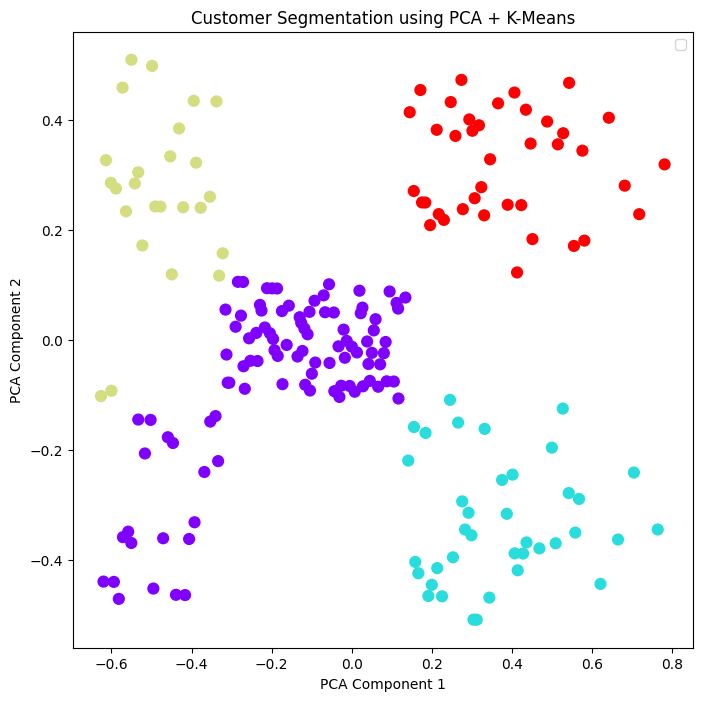

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(pca_data[:,0],pca_data[:,1], c=clusters, cmap='rainbow', s=60)
plt.title('Customer Segmentation using PCA + K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [34]:
data['Clusters'].value_counts()

,count
Clusters,
0,98
3,39
1,38
2,25


In [36]:
print("\nAverage feature values per cluster:")
print(data.groupby('Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


Average feature values per cluster:
                Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                       
0         44.112245           48.918367               43.295918
1         40.394737           87.000000               18.631579
2         25.480000           25.480000               75.440000
3         32.692308           86.538462               82.128205
